## **Data Analysis Portfolio Project: Favorita Retails Sales analysis and Forecast**
# **Exploratory Analysis**
_**Author**: Thu Pham | **Date**: 03/2015_


### **Table of Contents**
1. Data Wrangling  
     1.1 Import the data  
     1.2 Data Inspection  
     1.3 Data Cleaning & Handling  
2. Exploratory Analysis with SQL  
3. Sales Exploratory Visualization and Analysis  
     3.1 Overall Trend  
     3.2 Sales by locations  
     3.3 Sales by Product  


## **1. Data Wrangling**


### **1.1 Import the Data**

In [49]:
#!pip install kaggle

In [1]:

import pandas as pd
import numpy as np 
import seaborn as sns 

%matplotlib inline
import matplotlib.pylab as plt 
from matplotlib import pyplot 
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import io

In [51]:
# download the dataset using kaggle API 
#!kaggle competitions download store-sales-time-series-forecasting

In [52]:
# unzip the dataset 
#import zipfile
#zip_file_path = "G:/My Drive/Lily Career/Work/Portfolio/Favorita Retails - Sale Forecast/store-sales-time-series-forecasting.zip"
#destination = "G:/My Drive/Lily Career/Work/Portfolio/Favorita Retails - Sale Forecast/"

#with zipfile.ZipFile(zip_file_path,"r") as zip_ref:
    #zip_ref.extractall(destination)

In [2]:
# import the dataset 
def import_csv(path,delimiter = ","):
    return pd.read_csv("G:/My Drive/Lily Career/Work/Portfolio/Favorita Retails - Sale Forecast/" + path, delimiter = delimiter)

holidays_events = import_csv("holidays_events.csv")
oil_df = import_csv("oil.csv")
stores_df = import_csv("stores.csv")
test = import_csv("test.csv")
transactions = import_csv("transactions.csv")
train = import_csv("train_adjusted.csv",delimiter=";")


### **1.2 Data Inspection**

In [3]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [10]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [11]:
locale_type = holidays_events['locale'].unique().tolist()
locale_type

['Local', 'Regional', 'National']

In [12]:
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [13]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [14]:
oil_df[oil_df['dcoilwtico'].isnull()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [15]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [16]:
stores_unique = stores_df.nunique()
print(stores_unique)

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64


In [17]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [17]:
train.head(10)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


The Oil dataset contains some missing values in the 'dcoilwtico' column, indicating days where the oil price was not recorded. Apart from that, the data appears clean. The 'date' column is in the standard format, but depending on the analysis requirements, it may need to be converted into a datetime format for time series analysis.

### **1.3 Data Cleaning & Handling**

In [4]:
#Adjust data type 
transactions['date'] = pd.to_datetime(transactions['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

In [5]:
#Remove duplicate rows 
stores_df = stores_df.drop_duplicates()
oil_df = oil_df.drop_duplicates()
holidays_events = holidays_events.drop_duplicates()

In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


"In the  dataset, missing oil prices were filled by using the price from the previous date."

In [22]:
oil_df['dcoilwtico'].fillna(method='ffill', inplace=True)
oil_df.loc[0, 'dcoilwtico'] = oil_df.loc[1, 'dcoilwtico']
oil_df

C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\3453217510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil_df['dcoilwtico'].fillna(method='ffill', inplace=True)
C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\3453217510.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_df['dcoilwtico'].fillna(method='ffill', inplace=True)


,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [23]:
# Adjust the id column to start with 1 
train['id']= train['id'] +1 
test['id'] = test['id'] +1 


Perform preprocessing steps on holidays_events to extract meaningful seasonality factors 
- Transferred holidays should not be treated as holidays in their original date but on their actual celebrated date.

In [54]:
# Get the actual celebrated holidays 
actual_holidays = holidays_events[holidays_events['type'] == 'Transfer']

# Remove transfferred holidays and only keep the actual celebrated dates
holidays_events = holidays_events[holidays_events['transferred'] == False]
holidays = pd.concat([holidays_events,actual_holidays])

- Add Cyber Monday and Black Friday of 2017 to holidays df 
- Add holidays calendar for 2018 

In [55]:
# Add a "Black Friday" and "Cyber Monday" to the holidays DataFrame
new_row = [{'date': pd.Timestamp('2017-11-24'),'type':'Event','locale':'National','locale_name':'Ecuador','description': 'Black Friday','transferred':False},
           {'date': pd.Timestamp('2017-11-27'),'type':'Event','locale':'National','locale_name':'Ecuador','description': 'Cyber Moday','transferred':False}]
          

holidays = pd.concat([holidays, pd.DataFrame(new_row)], ignore_index=True)
# Sort the date in order 
holidays = holidays.sort_values('date')

In [56]:
# Import 2018 holidays data 
holidays_2018 = import_csv("holidays_2018.csv")
# Concat with the "holidays" dataframe
holidays_2018 = holidays_2018.drop(columns=['index','weekday'])
holidays = pd.concat([holidays,holidays_2018],axis=False)
holidays['date'] = pd.to_datetime(holidays['date'])
holidays = holidays.sort_values(by='date')
holidays


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
43,2018-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
44,2018-12-23,Additional,National,Ecuador,Navidad-2,False
45,2018-12-24,Transfer,National,Ecuador,Traslado Navidad,False
46,2018-12-25,Additional,National,Ecuador,Navidad,False


In [ ]:
# holidays_2017 = holidays[holidays['date'].dt.year == 2017]
# holidays_2017

# holidays_2017['weekday'] = holidays_2017['date'].dt.day_name()

# holidays_2017.to_csv("holidays_2017.csv")

C:\Users\PCPV\AppData\Local\Temp\ipykernel_25036\1450350076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_2017['weekday'] = holidays_2017['date'].dt.day_name()


Upon understanding the metadata in 'holiday' table, only take into account the most impact events, which are holiday/transfer type and event type and ingnore the others type (e.g,Bridge Days, Work Days )

In [20]:
# Filter event 'type'
holidays_filter = holidays[holidays['type'].isin(['Holiday','Event','Transfer'])]


# Aggregate holidays and events per date
holidays_feature = holidays_filter.groupby('date').agg({
                    'type': lambda x: ','.join(set(x)), # multiple type if any
                    'locale': lambda x: ','.join(set(x)), 
                    'locale_name' : lambda x: ','.join(set(x)), 
                    'description' : lambda x: ','.join(set(x)),
                    }).reset_index()

holidays_feature['is_holiday'] = 1 
holidays_feature.rename(columns={'type':'holiday_type'},inplace=True)

holidays_feature

,date,holiday_type,locale,locale_name,description,is_holiday
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,1
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,1
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,1
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,1
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,1
...,...,...,...,...,...,...
246,2017-11-11,Holiday,Local,Latacunga,Independencia de Latacunga,1
247,2017-11-12,Holiday,Local,Ambato,Independencia de Ambato,1
248,2017-12-08,"Holiday,Transfer",Local,"Quito,Loja","Traslado Fundacion de Quito,Fundacion de Loja",1
249,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,1


#### **1.3.1 Export clean tables**

In [ ]:
#Export clean table to csv type for SQL queries 
#oil_df.to_csv('cleaned_oil.csv',index=False)
#transactions.to_csv('cleaned_transactions.csv',index=False)
#holidays.to_csv('cleaned_holidays_events.csv',index=False)
#stores_df.to_csv('cleaned_stores.csv',index=False)
#train.to_csv('cleaned_train.csv',index=False,sep=';')

## **2. Exploratory Analytics with SQL**

### **2.1 General data queries**

1. Start date and End date of the dataset 

Transaction tables (fact table)

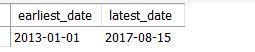

Oil table

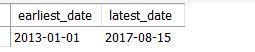


2. How many types of products are there? and the product list

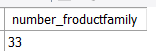

Family product list 

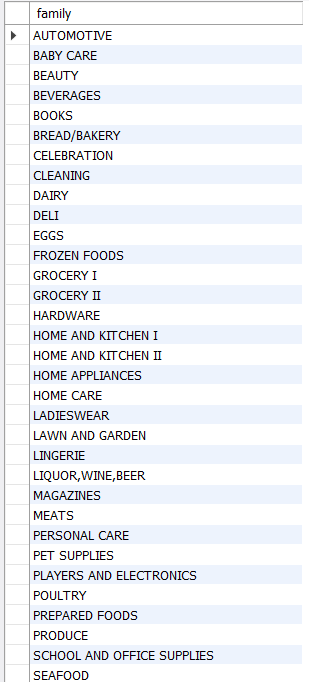

3. Stores and locations 

How many stores,cities and states are there? 

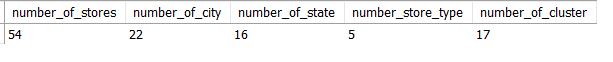

State & City list 

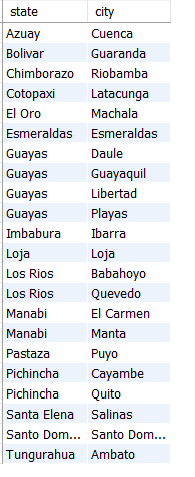

Store type list 

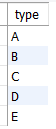


Stores & Clusters

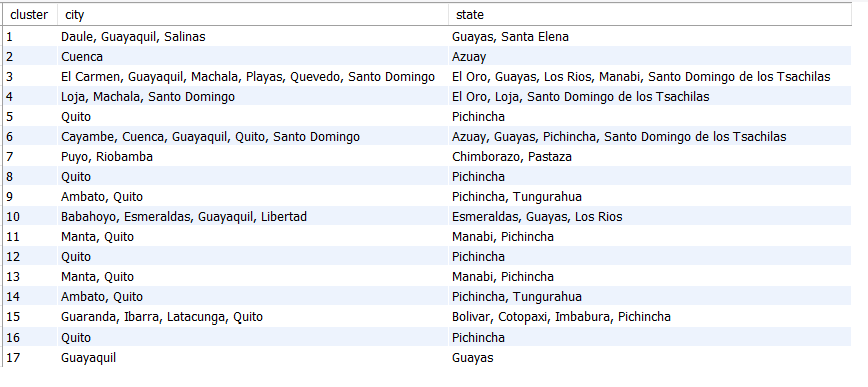

4. Holiday and Events 

The types of events 

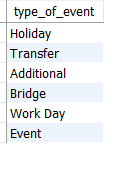

Number of holidays in a year 

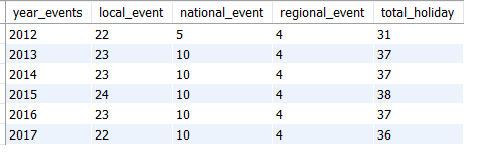



Regional Holiday list 

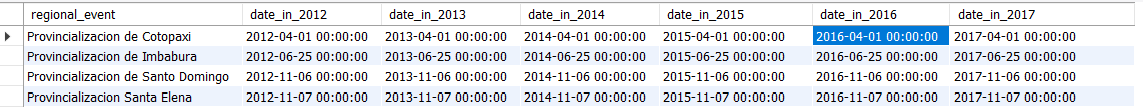

National Holidays list 

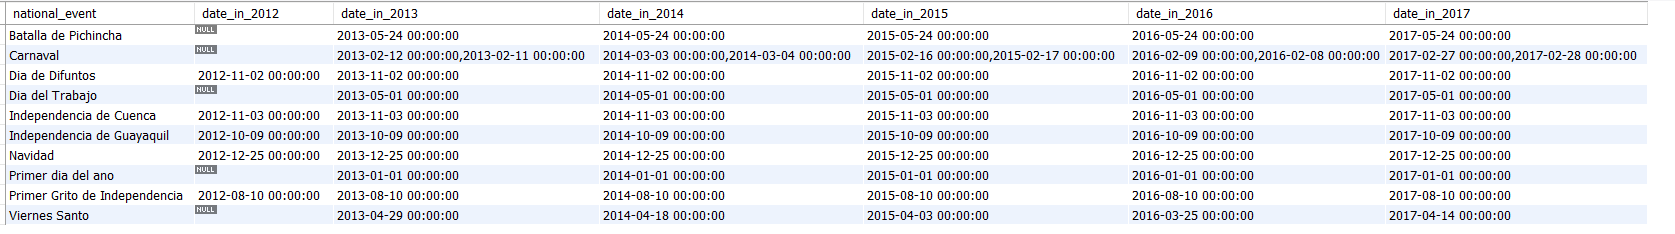

How many events are there in a year? and Events list in a year 

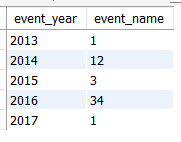

Event list reduce to significant and seasonaly events: Black Friday, Cyber Monday and Mother Day (Dia de la Madre)

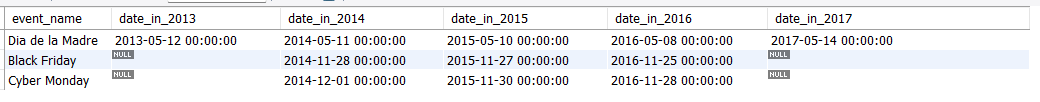

## **3. Sales Exploratory Analysis**

### **3.1 Overall Sales trends of Favorita** 


Text(0, 0.5, 'Total sale')

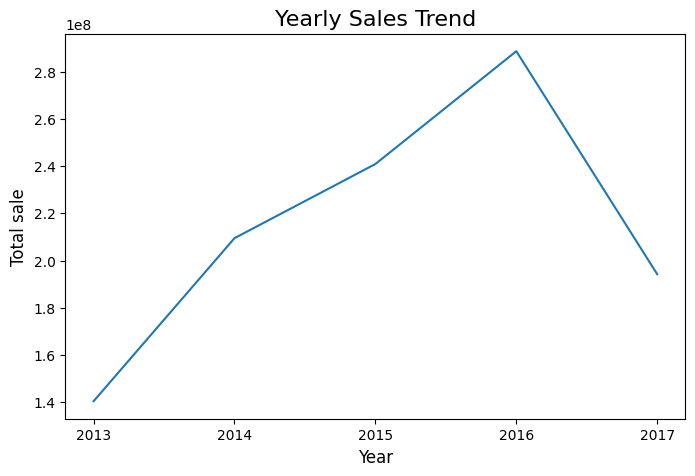

In [27]:
# Yearly Sales Trend line chart 

yearly_sale = train.groupby('Year')['sales'].sum().reset_index()

yearly_sale['Year'] = yearly_sale['Year'].astype('str')


plt.figure(figsize=(8,5))
plt.plot(yearly_sale['Year'],yearly_sale['sales'])

plt.title('Yearly Sales Trend',fontsize= 16)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Total sale',fontsize = 12)

Queries Results for Year Total Sales 

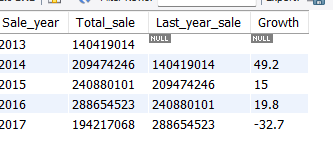

Data Table:

Quick insights:
- The overall trend is growing from 140ml in 2023 to 289ml in 2016
- With strongest growth exhibited in 2013 to 2014 up to 49% 
- The data in 2017 ended in 15th August, which explain the drop in actual sales


##### Last 12 months Sale Trend 

In [28]:
# Create table for Last 12 months Sale 
train['YearMonth'] = train['date'].dt.to_period("M").astype(str)
latest_date = train['date'].max()
last_12months = latest_date - pd.DateOffset(months=12)
YTD_sale = train[train['date'] >= last_12months]

# aggragate YTD_sale 
YTD_sale_sum = YTD_sale.groupby('YearMonth')['sales'].sum().reset_index()
YTD_sale_sum

,YearMonth,sales
0,2016-08,1.208088e+07
1,2016-09,2.241745e+07
2,2016-10,2.403039e+07
3,2016-11,2.464264e+07
4,2016-12,2.964029e+07
5,2017-01,2.632816e+07
6,2017-02,2.325011e+07
7,2017-03,2.670402e+07
8,2017-04,2.589531e+07
9,2017-05,2.691185e+07


Text(0, 0.5, 'Total sale')

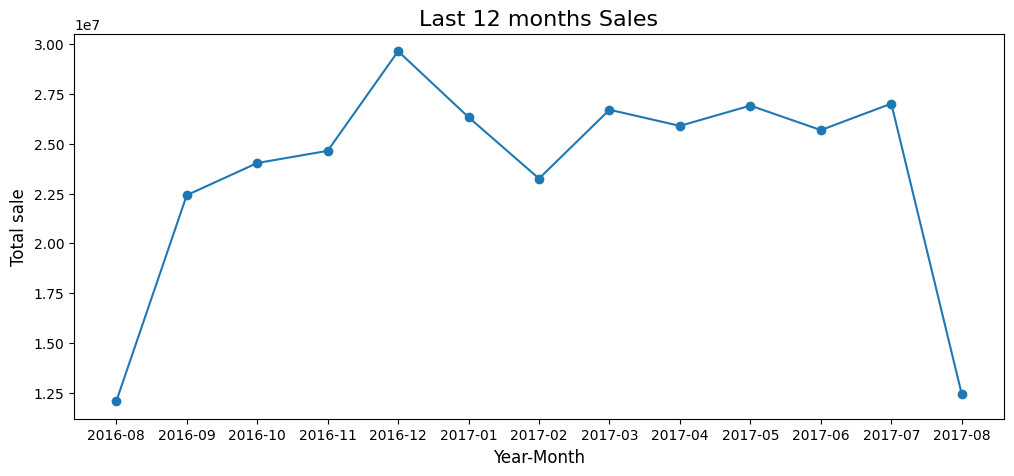

In [29]:
# plot line chart 
plt.figure(figsize=(12,5))
plt.plot(YTD_sale_sum['YearMonth'],YTD_sale_sum['sales'],marker='o')

plt.title('Last 12 months Sales',fontsize= 16)
plt.xlabel('Year-Month',fontsize = 12)
plt.ylabel('Total sale',fontsize = 12)

Queries result for YTD Monthly Sale 

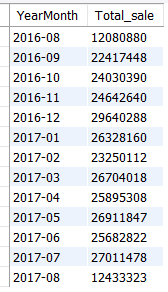

Data Table 

Quick insight:
- The last 12 months, the business since to perform stablely, however, total sales experience some seasonaly fluctuation.
- Sales reach a peak in December 2016 (30ml) after that the sale decreased, not until March 2017 that the sale return to a more stable state until present. This could signal a specific seasonality from the end of the year (probably holiday season) and in the begining of the New year. 
- The data of August 2016 and August 2017 each contains only 15 days of transaction, hence explain the sudden drop in total sales. 

#### MTD Sale Trend 

In [30]:
# Create a df for last 30 day sale 
last_30days = latest_date - pd.DateOffset(days=30)
MTD_sale = train[train['date'] >= last_30days]
MTD_sale_sum = MTD_sale.groupby('date')['sales'].sum().reset_index()

Text(0, 0.5, 'Total sale')

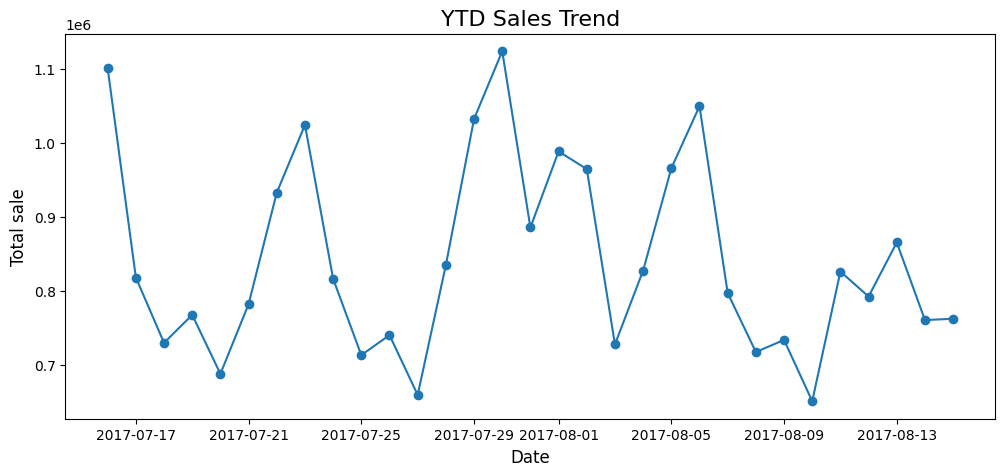

In [31]:
# Plot line chart for MTD Sale 
plt.figure(figsize=(12,5))
plt.plot(MTD_sale_sum['date'],MTD_sale_sum['sales'],marker='o')

plt.title('YTD Sales Trend',fontsize= 16)
plt.xlabel('Date',fontsize = 12)
plt.ylabel('Total sale',fontsize = 12)

#### Monthly Sales Trend 

In [32]:
# Merge the transaction and store table to the train table 

train = train.merge(stores_df, on='store_nbr', how='left')
train = train.merge(transactions, on=['date','store_nbr'], how='left')
train['transactions'].fillna(0, inplace=True)

train['Month'] = train['date'].dt.strftime('%b')
train = train.sort_values(by='date')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\1859542320.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['transactions'].fillna(0, inplace=True)


C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\3837740253.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_transactions = train.groupby(['Year', 'Month'])['transactions'].sum().reset_index()
C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\3837740253.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_per_transaction = train.groupby(['Year', 'Month']).apply(lambda x: x['sales'].sum() / x['transactions'].sum()).reset_index(name='sales_per_transaction')
C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\3837740253.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping

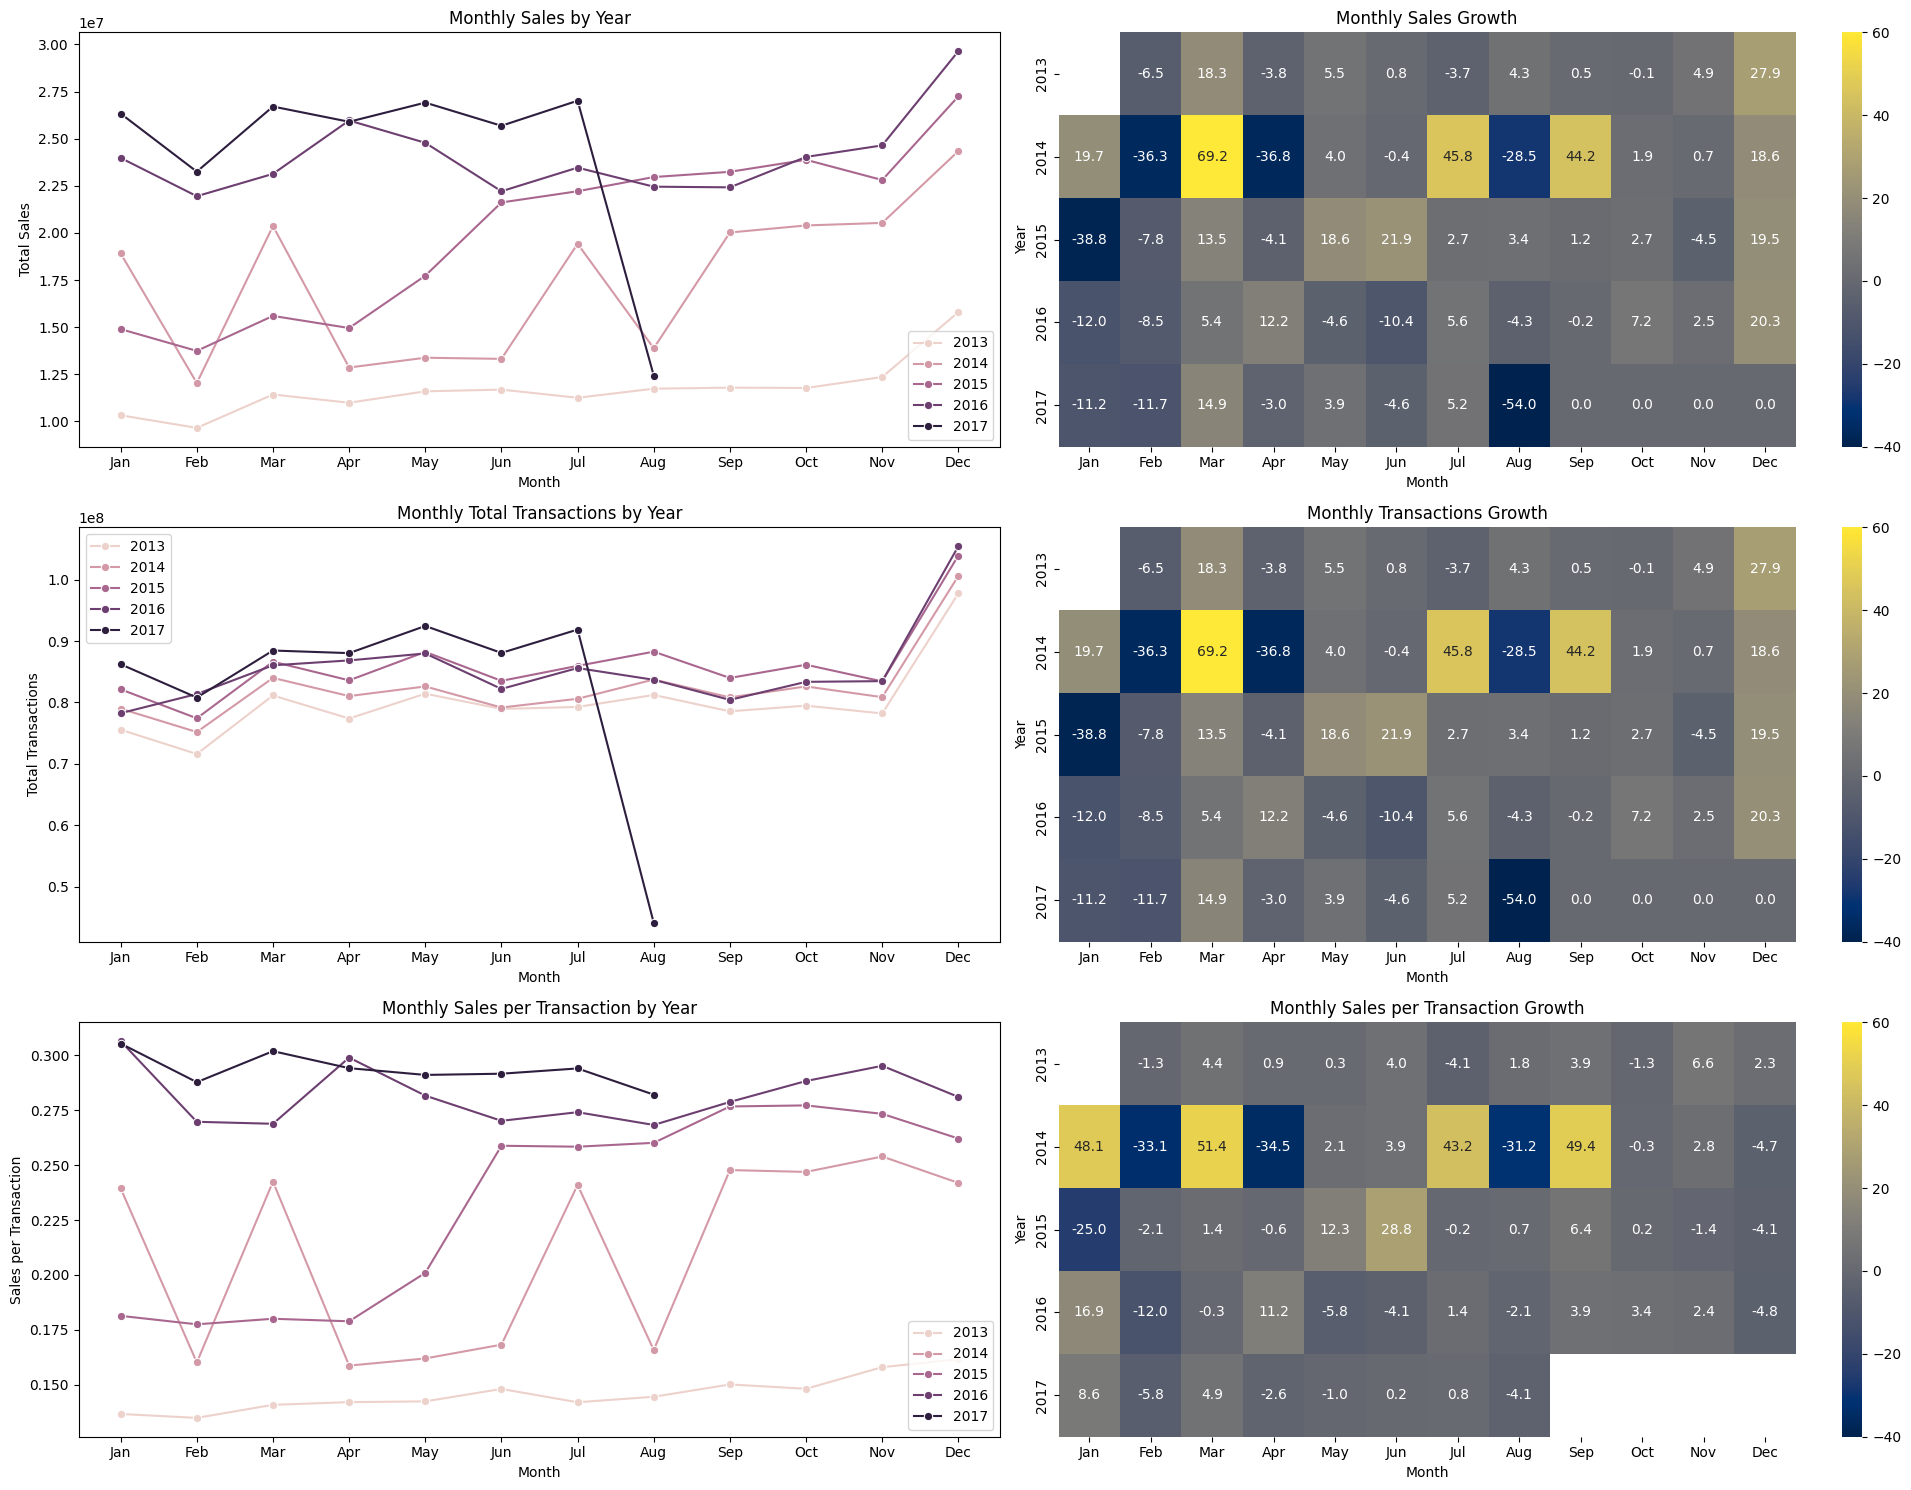

In [33]:

# Calculate tables for 3 metrics 
train['Month'] = pd.Categorical(train['Month'], categories=month_order, ordered=True)
monthly_transactions = train.groupby(['Year', 'Month'])['transactions'].sum().reset_index()
monthly_sales_per_transaction = train.groupby(['Year', 'Month']).apply(lambda x: x['sales'].sum() / x['transactions'].sum()).reset_index(name='sales_per_transaction')
monthly_sales = train.groupby(['Year', 'Month'])['sales'].sum().reset_index()

# Replace 0 values with NaN
monthly_transactions.replace(0, np.nan, inplace=True)
monthly_sales_per_transaction.replace(0, np.nan, inplace=True)
monthly_sales.replace(0, np.nan, inplace=True)

# Calculate growth for 3 metrics 
monthly_transactions['Growth'] = monthly_transactions['transactions'].pct_change() * 100
monthly_sales_per_transaction['Growth'] = monthly_sales_per_transaction['sales_per_transaction'].pct_change() * 100
monthly_sales['Growth'] = monthly_sales['sales'].pct_change() * 100

# Pivot tables for growth
monthly_transactions_growth_piv = monthly_sales.pivot_table(index='Year', columns='Month', values='Growth')[month_order]
monthly_sales_per_transaction_growth_piv = monthly_sales_per_transaction.pivot_table(index='Year', columns='Month', values='Growth')[month_order]
monthly_sales_growth_piv = monthly_sales.pivot_table(index='Year', columns='Month', values='Growth')[month_order]

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Plot monthly sum of sales
sns.lineplot(monthly_sales,x='Month', y='sales', hue='Year',marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Monthly Sales by Year')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].legend()

# Plot monthly sum of transactions
sns.lineplot(monthly_transactions,x='Month', y='transactions', hue='Year',marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Total Transactions by Year')
axes[1, 0].set_ylabel('Total Transactions')
axes[1, 0].legend()

# Plot monthly sales per transaction
sns.lineplot(monthly_sales_per_transaction,x='Month', y='sales_per_transaction', hue='Year',marker='o', ax=axes[2, 0])
axes[2, 0].set_title('Monthly Sales per Transaction by Year')
axes[2, 0].set_ylabel('Sales per Transaction')
axes[2, 0].legend()
# Define a common color map for the heatmaps
cmap = 'cividis'
vmin, vmax = -40, 60

# Plot heatmap of monthly sales growth
sns.heatmap(monthly_sales_growth_piv, cmap=cmap, annot=True, fmt=".1f", ax=axes[0, 1], vmin=vmin, vmax=vmax)
axes[0, 1].set_title('Monthly Sales Growth')
axes[0, 1].set_ylabel('Year')

# Plot heatmap of monthly transactions growth
sns.heatmap(monthly_transactions_growth_piv, cmap=cmap, annot=True, fmt=".1f", ax=axes[1, 1], vmin=vmin, vmax=vmax)
axes[1, 1].set_title('Monthly Transactions Growth')
axes[1, 1].set_ylabel('Year')

# Plot heatmap of monthly sales per transaction growth
sns.heatmap(monthly_sales_per_transaction_growth_piv, cmap=cmap, annot=True, fmt=".1f", ax=axes[2, 1], vmin=vmin, vmax=vmax)
axes[2, 1].set_title('Monthly Sales per Transaction Growth')
axes[2, 1].set_ylabel('Year')

plt.tight_layout()
plt.show()


SQL queries data table of Monthly Sale Trend 

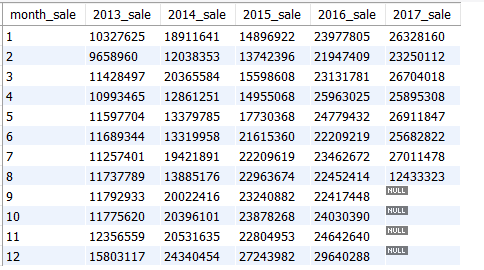

Data Table:

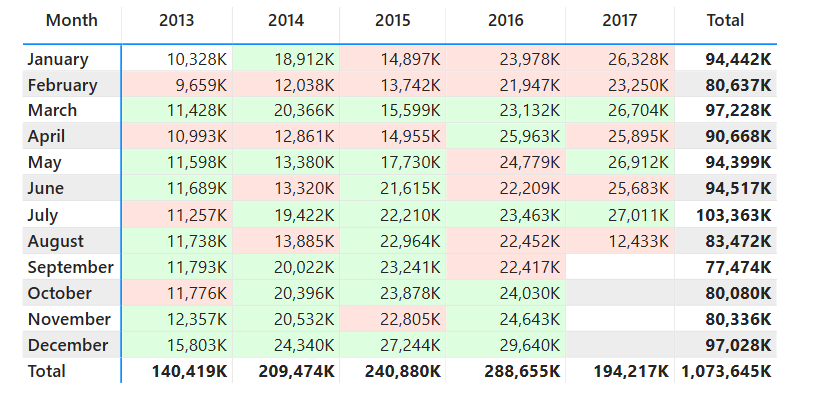

***Quick Insights***: 
- Overall the sales is going upward toward the end of the year (period from October to December), this could be observed in every year. 
- In 2017, the data ended at 15/8/2017, however, the highest sale peak in July 2017. 
- For the rest, 2016 seemed to have the highest sale same period compared to 2013-2015. 
- There seemed to be a recurrenced phenomene across the years: 
    - a drop of sale in February and 
    - recover from March 
    - then followed by a slight drop in April (with the exception of 2016)
    - However after the peak sales in December, there's a significant drop in January of the next year 

#### Daily sales with Moving average 

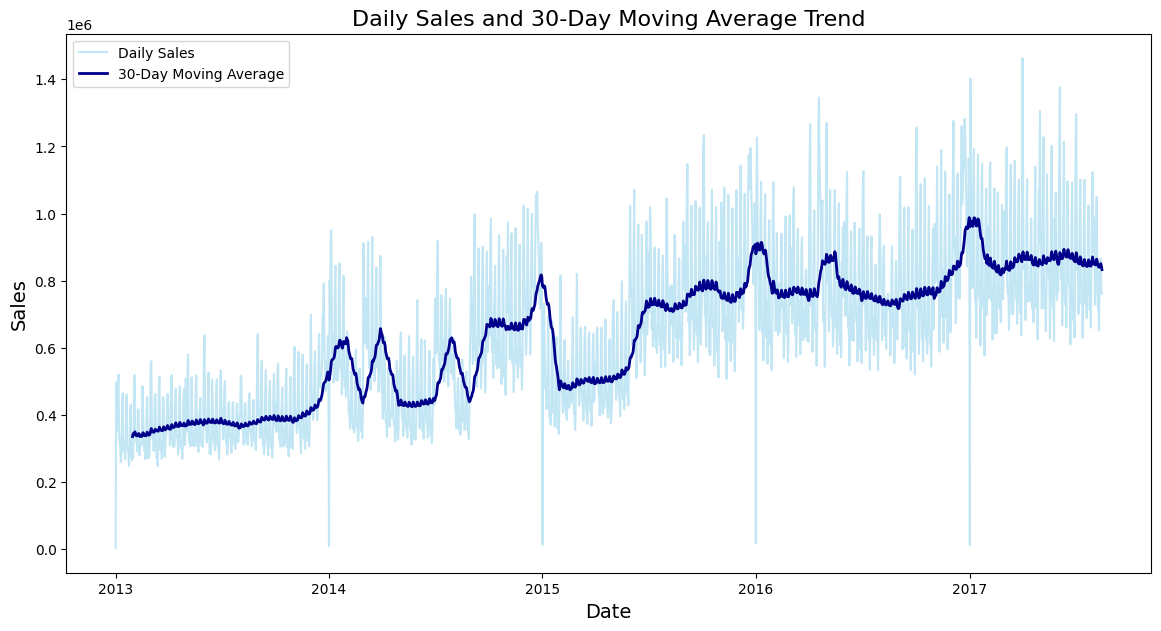

In [34]:
# Aggregate daily sales
daily_sales = train.groupby('date')['sales'].sum().reset_index()

# Calculate the 30-day moving average of daily sales
daily_sales['30_day_ma'] = daily_sales['sales'].rolling(window=30).mean()

# Plot the daily sales and 30-day moving average
plt.figure(figsize=(14, 7))

# Original daily sales with transparency
plt.plot(daily_sales['date'], daily_sales['sales'], label='Daily Sales', color='skyblue', alpha=0.5)

# 30-day moving average of sales
plt.plot(daily_sales['date'], daily_sales['30_day_ma'], label='30-Day Moving Average', color='darkblue', linewidth=2)

plt.title('Daily Sales and 30-Day Moving Average Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()

plt.show()

Sales trend with promotions - Yearly sales trends
Sales have an upward trend over time, indicating overall business growth.
The moving average (dark blue line) smooths the fluctuations and confirms steady growth from 2013 to 2017.
The light blue line (daily sales) fluctuates heavily, showing high variability in day-to-day sales.

#### Average Sales: by weekdate and Month

C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\3470604715.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sales_avg_pivot = train.pivot_table(index='Weekday', columns='Month', values='sales', aggfunc='mean')


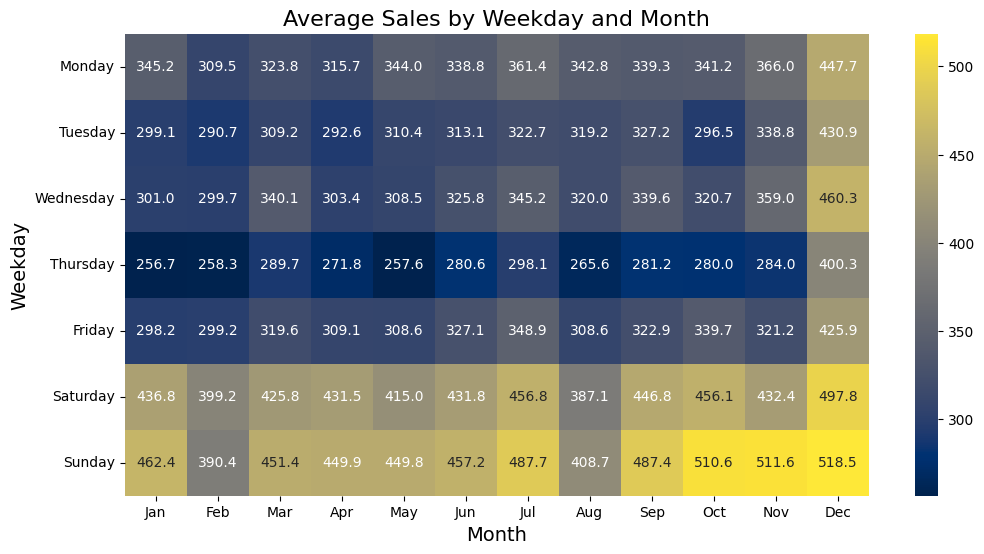

In [35]:
# Add Weekday column to the train dataset
train['Weekday'] = train['date'].dt.strftime('%A')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregate sales by weekday and month
sales_avg_pivot = train.pivot_table(index='Weekday', columns='Month', values='sales', aggfunc='mean')
sales_avg_pivot = sales_avg_pivot.reindex(index=weekday_order, columns=month_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_avg_pivot, cmap='cividis', annot=True, fmt=".1f")

plt.title('Average Sales by Weekday and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Weekday', fontsize=14)
plt.show()

### **3.2 Sales trend and Promotion**

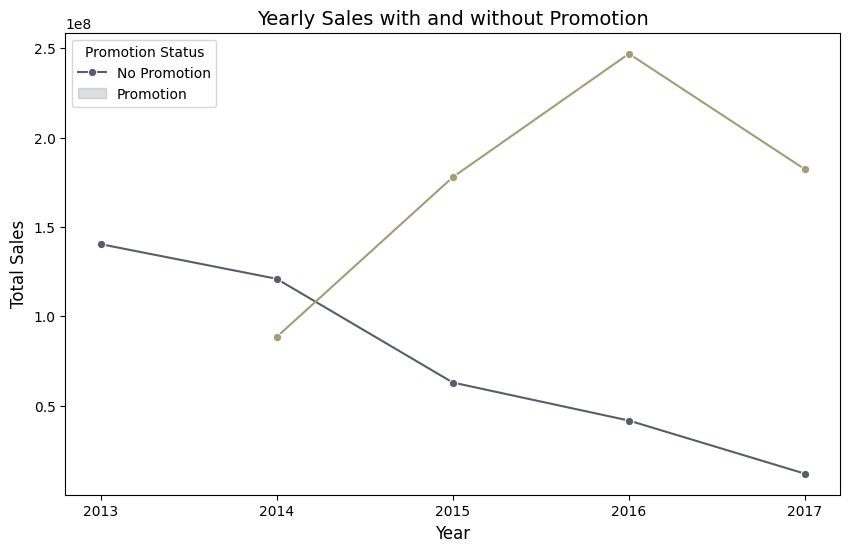

In [36]:
# Create a 'promo_status' columns with 1 or 0 for promotion availabel 
train['promo_status'] = train['onpromotion'].apply(lambda x: 1 if x != 0 else 0)

#Prepare and plot the line charts for yearly sales with and without promotion 
promo_sales = train.groupby(['Year','promo_status'])['sales'].sum().reset_index()
promo_sales['Year'] = promo_sales['Year'].astype('str')

# Plot the line chart yearly sales with and without promotion 
plt.figure(figsize=(10,6))

sns.lineplot(promo_sales,x='Year',y='sales',hue='promo_status',marker='o',palette='cividis')

plt.title('Yearly Sales with and without Promotion', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Promotion Status', labels=['No Promotion', 'Promotion'])
plt.show()

C:\Users\PCPV\AppData\Local\Temp\ipykernel_21076\3587384088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_by_promo = train.groupby(['Year', 'Month', 'promo_status'])['sales'].sum().reset_index()


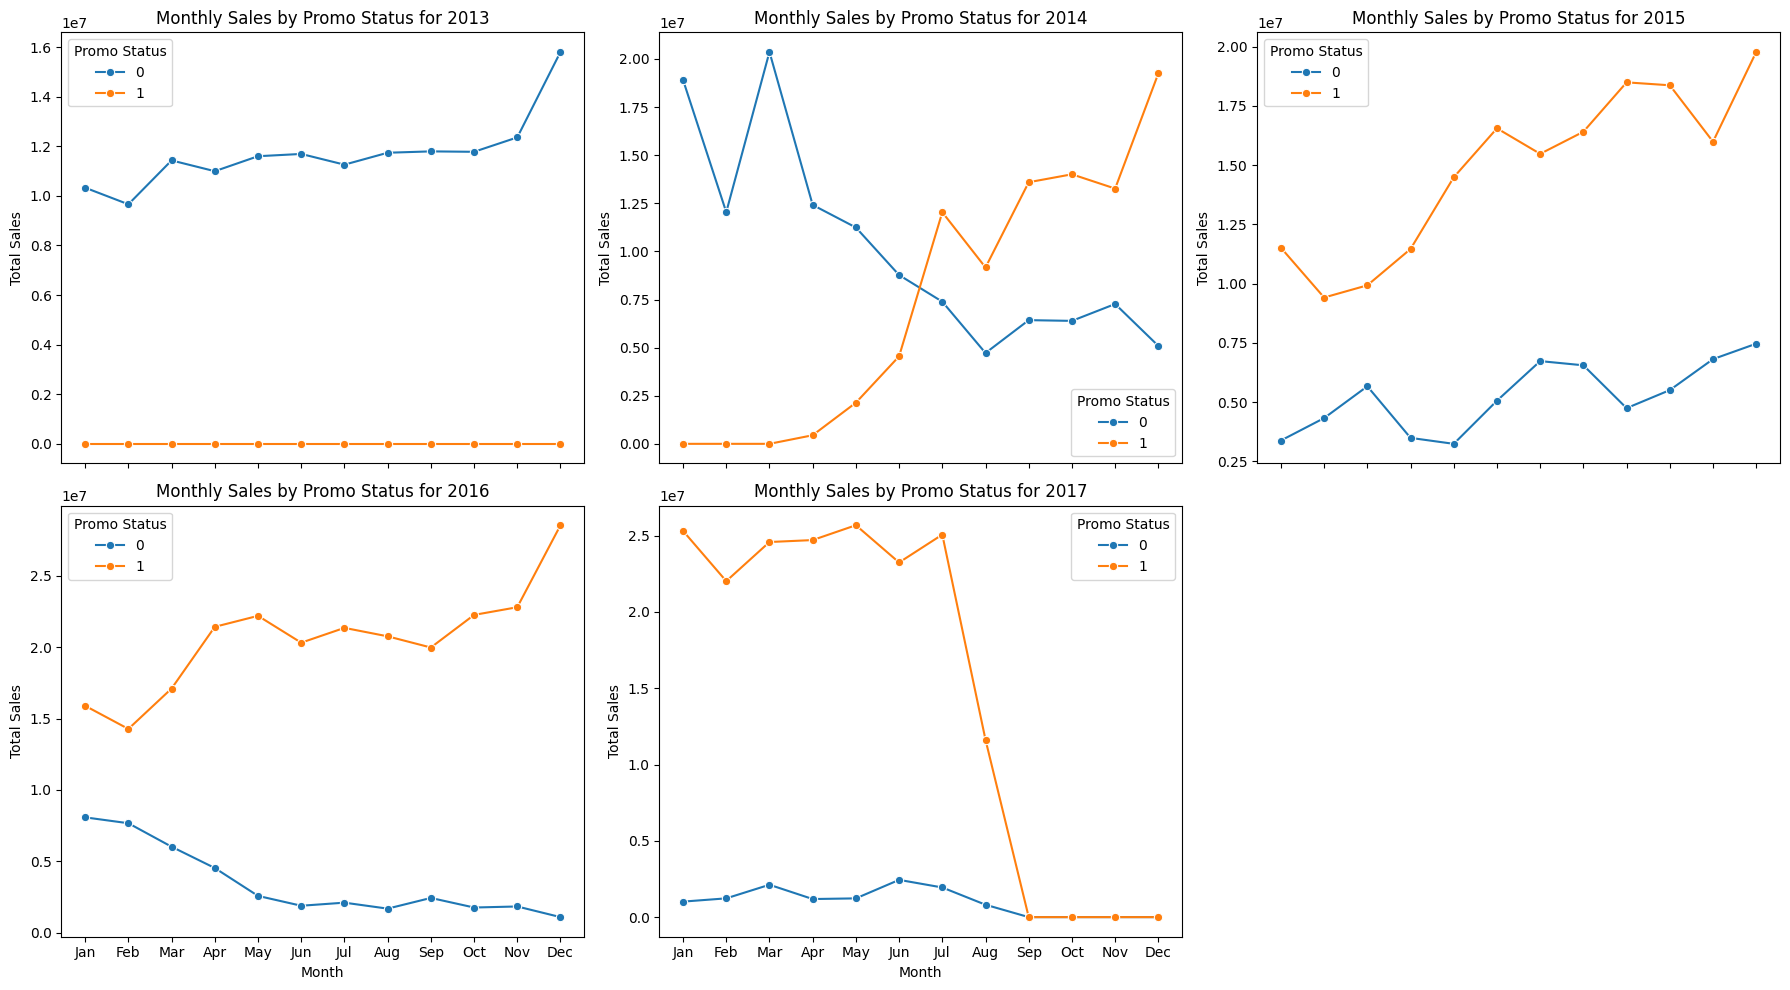

In [37]:
# Prepare the dataframe for monthly sales from each year 
year_list = train['Year'].unique().tolist()

# Ensure the 'Month' column is ordered correctly
train['Month'] = pd.Categorical(train['Month'], categories=month_order, ordered=True)

# Prepare dataframe of monthly sales by promo_status for each year from year_list
monthly_sales_by_promo = train.groupby(['Year', 'Month', 'promo_status'])['sales'].sum().reset_index()

# Plot the line charts for each year as subplot in a figure

fig, axes = plt.subplots(2,3, figsize=(18, 10), sharex=True)

for n, year in enumerate(year_list):
    row = n // 3
    col = n % 3
    ax = axes[row, col]
    yearly_data = monthly_sales_by_promo[monthly_sales_by_promo['Year'] == year]
    sns.lineplot(data=yearly_data, x='Month', y='sales', hue='promo_status', marker='o', ax=ax)
    ax.set_title(f'Monthly Sales by Promo Status for {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales')
    ax.legend(title='Promo Status')

# Remove any empty subplots
for i in range(len(year_list), 6):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


    

SQL Queries 

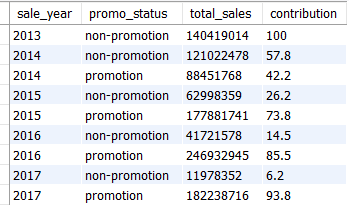


*Quick Insights* 

**Sales by Promotion Status**: The trend indicates that promotions play a crucial role in driving sales.
    - Sales with promotions show a significant contribution to the overall sales, especially in 2015 with promotional sales account for 73.8% and 2016 85.5%.
    - Promotional sales usually start by July and peak in December (Holiday seasons)

These insights can help in understanding the sales trends, consumer behavior, and the impact of promotions on sales. They can also guide strategic decisions for marketing, inventory management, and regional sales planning.

### **3.3 Sales by locations**
Look into the sale trend by locations (states), stores, store types from the last 12 months to evaluate the performance by locations and customer behavior and regional preferences.

Top 10 stores with highest sales last 12 months 

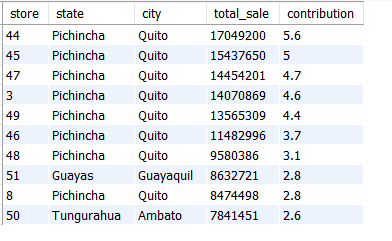

Top 10 stores with lowest sales last 12 months 

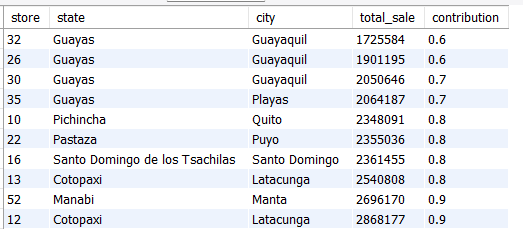

Sales by City last 12 months 

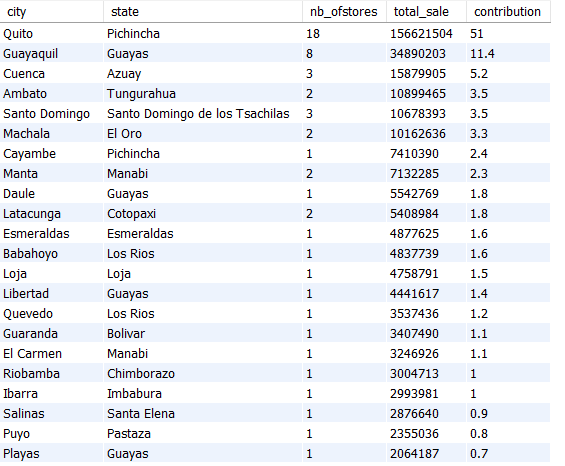

#### Sales by state by the last 12 months 

In [38]:
# Import plotly.express library and plot the chart
import plotly.express as px

In [39]:
# Prepare the df for sales by state 
state_sales = YTD_sale.merge(stores_df,on='store_nbr',how='inner')
sales_by_state = state_sales.groupby(['YearMonth','state'])['sales'].sum().reset_index()


# Assign the colormap 
state_list = sales_by_state['state'].unique()
colors_area = cm.cividis(np.linspace(0,1,len(state_list)))

# Plot the chart 
fig = px.area(sales_by_state,x='YearMonth',y='sales',
             color='state',
             title='Sales by States of the last 12 months',
             color_discrete_sequence=px.colors.sequential.Cividis)


fig.update_layout(
    width=1200,  # Set the width of the figure
    height=700,  # Set the height of the figure
    xaxis_title= 'Month',
    yaxis_title='Total Sales'
)

fig.show()



In [40]:
# Prepare data and plot the area chart for Yearly Sales By State 
yearly_state_sale = train.groupby(['Year','state'])['sales'].sum().reset_index()

# Plot the area chart 
fig = px.area(yearly_state_sale,x='Year',y='sales',
              color='state',
              title='Yearly Sales by States',
              color_discrete_sequence=px.colors.sequential.Cividis)


fig.update_layout(width=1200, height=700,
                  xaxis_title = 'Year',yaxis_title='Total Sales')

fig.show()

#### Sales by State from the last 12 months

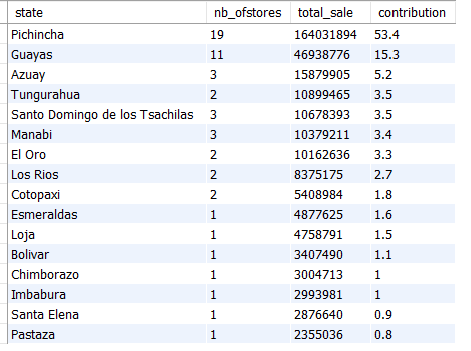

*Quick insights:* 
- Sales distribution is concentrated in major states/cities (Pichincha/Quito, Guayas/Guayaquil) with over 50% contribution, showing minimal fluctuation over 12 months.
- All states shared the same grow trend over the years.
- Pichincha (53.4%, 19 stores) and Guayas (15.3%, 11 stores) are top performers. Second-tier states (Azuay, Tungurahua, Santo Domingo de los Tsachilas, Manabi, El Oro) contribute 3.3%-5.2% and average 2 stores. Lower-performing locations have 1 store (Pastaza lowest).

#### Sales by Store types 

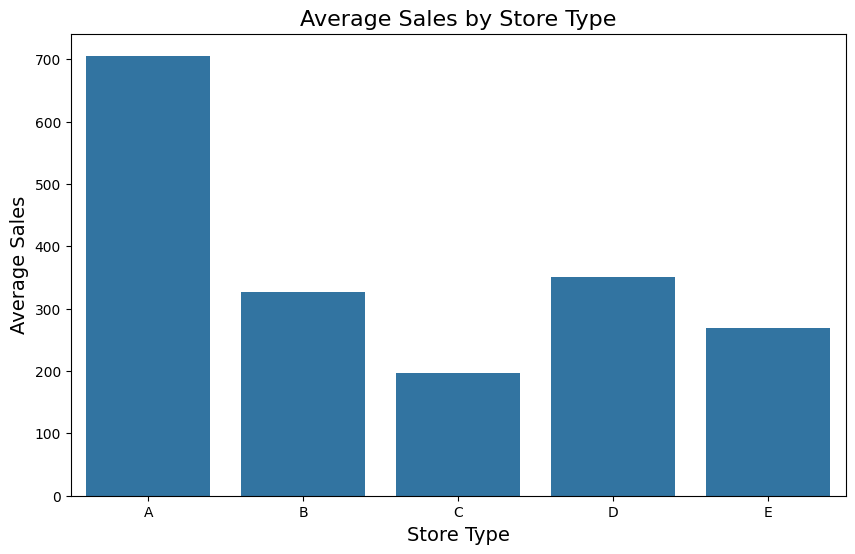

In [41]:
# Plot the bar chart for the average sales by store type
avg_sales_store_type = train.groupby('type')['sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_store_type, x='type', y='sales')

plt.title('Average Sales by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)

plt.show()

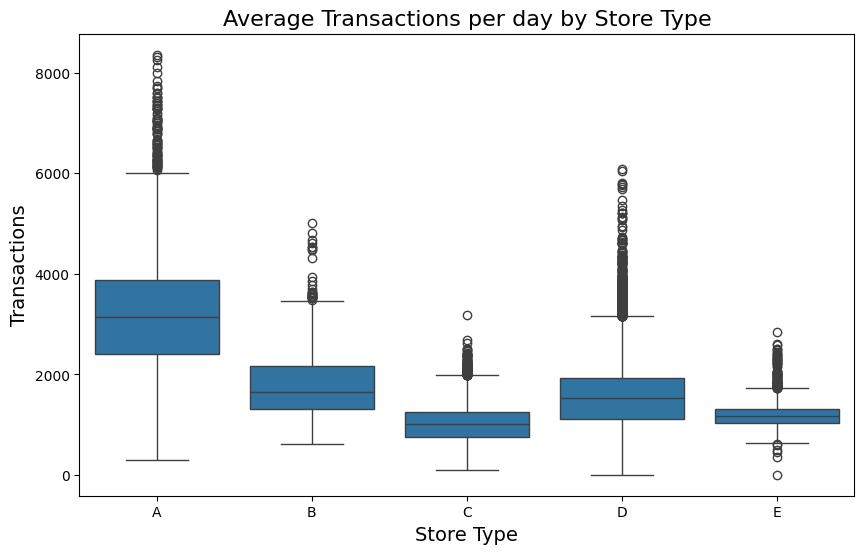

In [42]:
# Merge the transaction data with the store data
store_transactions = transactions.merge(stores_df, on='store_nbr', how='inner')

# Plot the boxplot for the transactions by store type
store_type_order = ["A","B","C","D","E"]
store_transactions['type'] = pd.Categorical(store_transactions['type'], categories=store_type_order, ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=store_transactions, x='type', y='transactions')

plt.title('Average Transactions per day by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Transactions', fontsize=14)

plt.show()

*Insights from the Chart:*

Store Type A and D have the most variation and highest number of outliers, meaning some stores perform exceptionally well.
Store Type E is the most stable but has lower transactions overall.
Outliers (dots above the whiskers) indicate stores with unusually high transactions compared to others in the same category.

### **3.4 Sales by Products**

Sales by product YTD - query resutls (inconclusive)

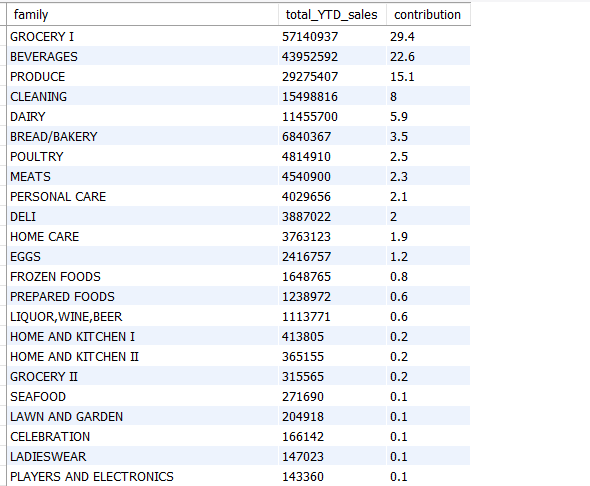

To enable better analysis and management, it's necessary to re-categorize product families into higher granularity groups.

In [43]:
# Populate new dataframe to re-categorize product families 
product_category = {
                    'family':['AUTOMOTIVE', 'CELEBRATION', 'BREAD/BAKERY', 'BOOKS', 'BEVERAGES', 'BEAUTY', 'BABY CARE', 'SEAFOOD', 'SCHOOL AND OFFICE SUPPLIES', 'PRODUCE', 'PREPARED FOODS', 'POULTRY', 'PLAYERS AND ELECTRONICS', 'PET SUPPLIES', 'PERSONAL CARE', 'MEATS', 'MAGAZINES', 'LIQUOR,WINE,BEER', 'LINGERIE', 'LAWN AND GARDEN', 'LADIESWEAR', 'HOME CARE', 'HOME APPLIANCES', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'HOME AND KITCHEN II', 'HOME AND KITCHEN I', 'HARDWARE', 'GROCERY II', 'GROCERY I', 'FROZEN FOODS'],
                    'category':['electronic and automotive','pet and other','grocery','pet and other','beverages','health and beauty','health and beauty','grocery','pet and other','grocery','grocery',
                                'grocery','electronic and automotive','pet and other','health and beauty','grocery','pet and other','beverages','apparel','household','apparel','home care','household','home care','grocery','grocery','grocery','household','household','household','grocery','grocery','grocery']
                    }
family_info = pd.DataFrame(product_category)
family_info = family_info.sort_values('category')
family_info = family_info.reset_index()
family_info = family_info.drop(columns='index')

# export the df into csv 
#family_info.to_csv('family_info.csv',sep=';',index=False)

#### Sale by new products category from the last 12 months 
Analyzing sales by product in higher granularity enables clearer insights into product area performance, local market trends, and customer preferences, ultimately improving planning and strategy for marketing, inventory, and finance management.

In [44]:
# Prepare data for last 12 months sale by new product category 
sale_store_family_data = train.merge(family_info,on='family',how='inner')
last12m_family_sale = sale_store_family_data[sale_store_family_data['date'] >= last_12months]

last12m_family_sum = last12m_family_sale.groupby(['YearMonth','category'])['sales'].sum().reset_index()

# Plot the stacked area chart 
fig = px.area(last12m_family_sum,x='YearMonth',y='sales',
              color='category',
              title='Sales by product category last 12 months',
              color_discrete_sequence=px.colors.sequential.Cividis)

fig.update_layout(width=1200, height=700,
                  xaxis_title = 'Month',yaxis_title='Total Sales')
fig.show()

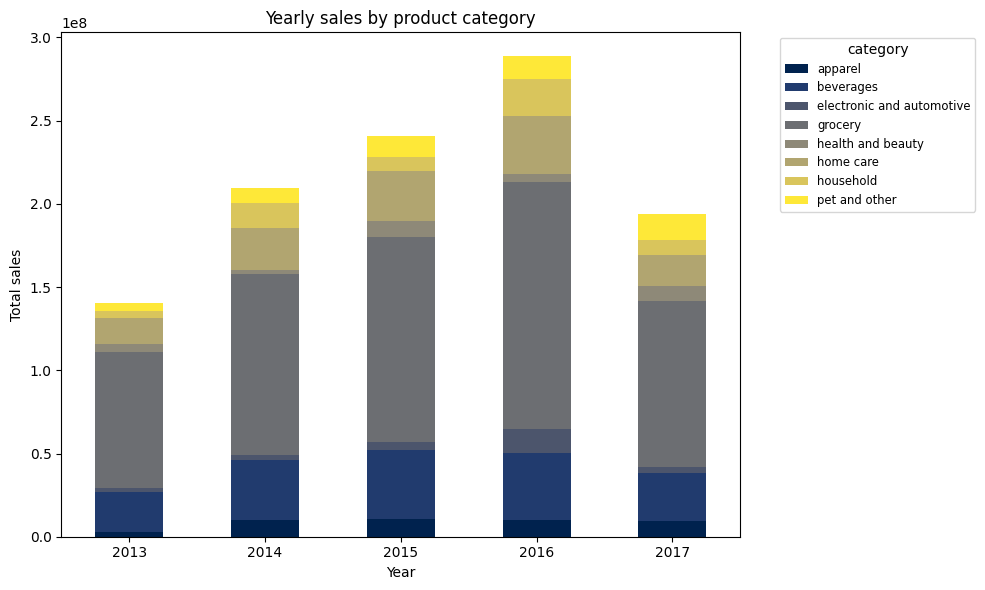

In [45]:
# Plot barchart for Yearly sale by category 
# Prepare the dataframe sales by year and category 
yearly_family_sum = sale_store_family_data.groupby(['Year','category'])['sales'].sum().reset_index()
yearly_family_piv = yearly_family_sum.pivot_table(index='Year',columns='category',values='sales')

# Plot the bar chart 
yearly_family_piv.plot(kind='bar',stacked=True,
                       figsize=(10,6),colormap='cividis')

plt.title('Yearly sales by product category')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend(title='category',bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small')
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()


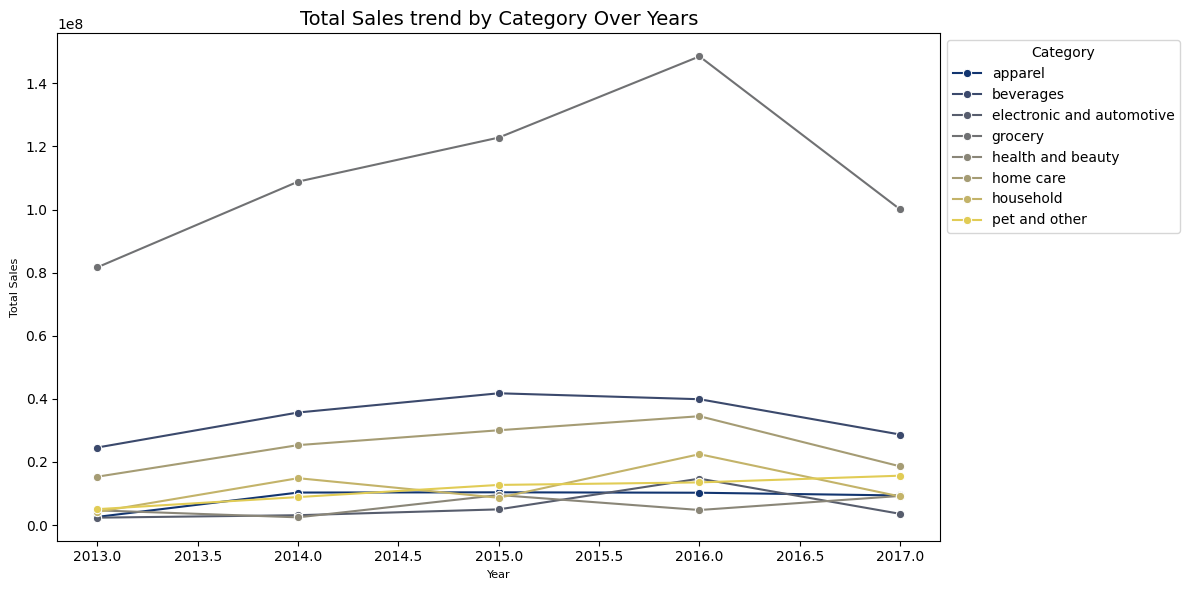

In [46]:
# Calculate contribution by year for each category 
yearly_family_sum['Yearly total']=yearly_family_sum.groupby('Year')['sales'].transform('sum')
yearly_family_sum['%yearly'] = (yearly_family_sum['sales']/yearly_family_sum['Yearly total'])*100
yearly_family_sum['growth'] = yearly_family_sum.groupby('category')['sales'].pct_change() *100

# Plot a line chart to analyze the trend of sale distribution by product 
plt.figure(figsize=(12,6))

sns.lineplot(yearly_family_sum,x='Year',y='sales',hue='category',marker='o',palette='cividis')

plt.title('Total Sales trend by Category Over Years', fontsize=14)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Total Sales', fontsize=8)
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

Queries results 

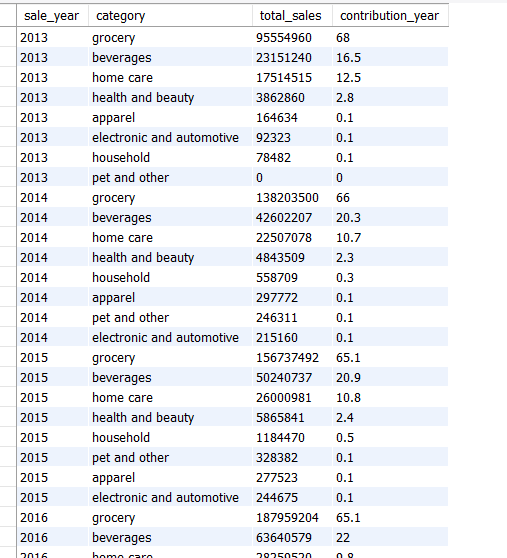

Data table - Yearly Sale by categories 

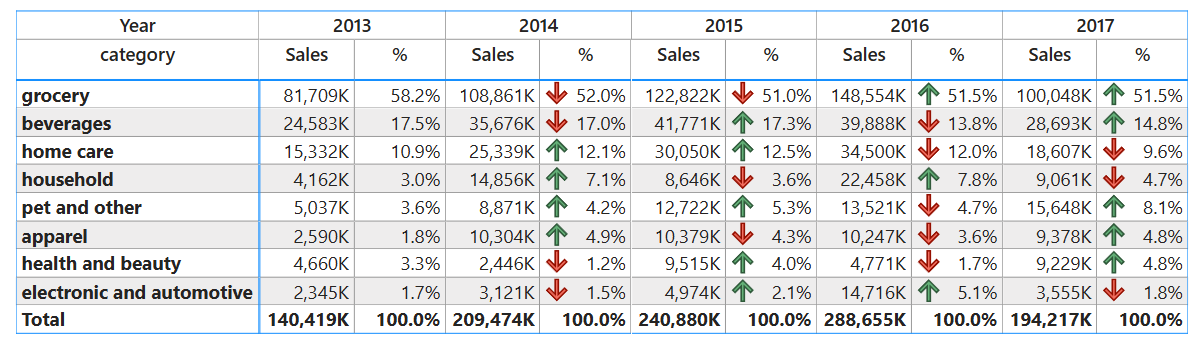

Data table - Yearly Sale & Growth by categories 

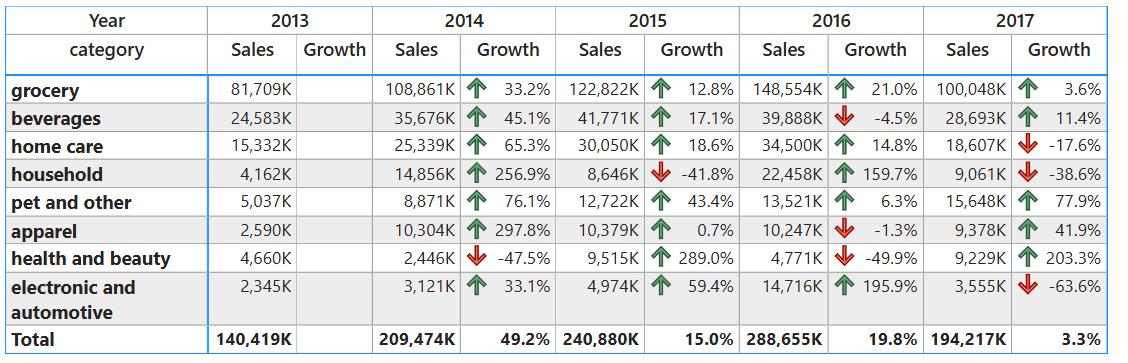

*Quick insight:*
- There are a minor transition from the top selling categories (essential products grocery and beverage) to other less essential categories (pet, beauty & healthcare,appearal).
- Though grocery category contribution experiences fluctuations and overall decline over the years (from 58.2% to 5105% in 2017), it is still the largest contribution to the company revenue, reserving its position in the business fundamental operations. 
- Beverages exhibit a notable downward trend in percentage contribution, decreasing from 17.5% in 2013 to 14.8% in 2017, suggesting a downturn in consumer demand for this category.
- In categories such as pet & other, appearal, health & beauty, the upward trend is noticable especially in pet & other (from 3.6% in 2023 to 8.1% in 2017), signaling a shift in consumer behavior.
- In 2016, there's a subtaicial trend of strong consumption in essentials products such as grocery (growth 21%), homecare (14.8%), household (159.7%) and electronic (195.9%). This can be explained by the effect of 


#### Top Category Sales Deep Dive


In [47]:
# Prepare data of sales by each family products in the top categories:
def sales_in_category(category,df):
    # Filter the dataframe by category and timeframe
    df_filtered = df[(df["category"] == category) & (df['date'] >= last_12months)]
    
    # Create pivot table with sales aggregated by YearMonth and family
    category_sales = df_filtered.groupby(['YearMonth','family'])['sales'].sum().reset_index()

    return category_sales

# Lists of categories to analyze 
category_list = ['grocery','beverages','home care']

category_sale_tables = {}

# Generate pivot tables for each category 
for category in category_list:
    pivot_name = f"l12m_sales_{category.replace(' ','_')}"
    category_sale_tables[pivot_name] = sales_in_category(category,sale_store_family_data)

# Plot the area charts for each category 

for i, (category,pivot_df) in enumerate(category_sale_tables.items()):
    # Loop through the tables and plot area chart 
    fig_px = px.area(pivot_df,
                     x='YearMonth',y='sales',color='family',
                     title=f"Last 12 months Total Sales - {category}")
    fig_px.update_layout(legend=dict(orientation="h",
                                     yanchor='top',y=-0.3,
                                     xanchor='center',x=0.5,
                                     title=None),
                        height=600,width=800,
                        xaxis_title='Month',yaxis_title='Total Sales')
    fig_px.show()

plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

#### Top selling product family from major cities (Quito & Guayaquil)

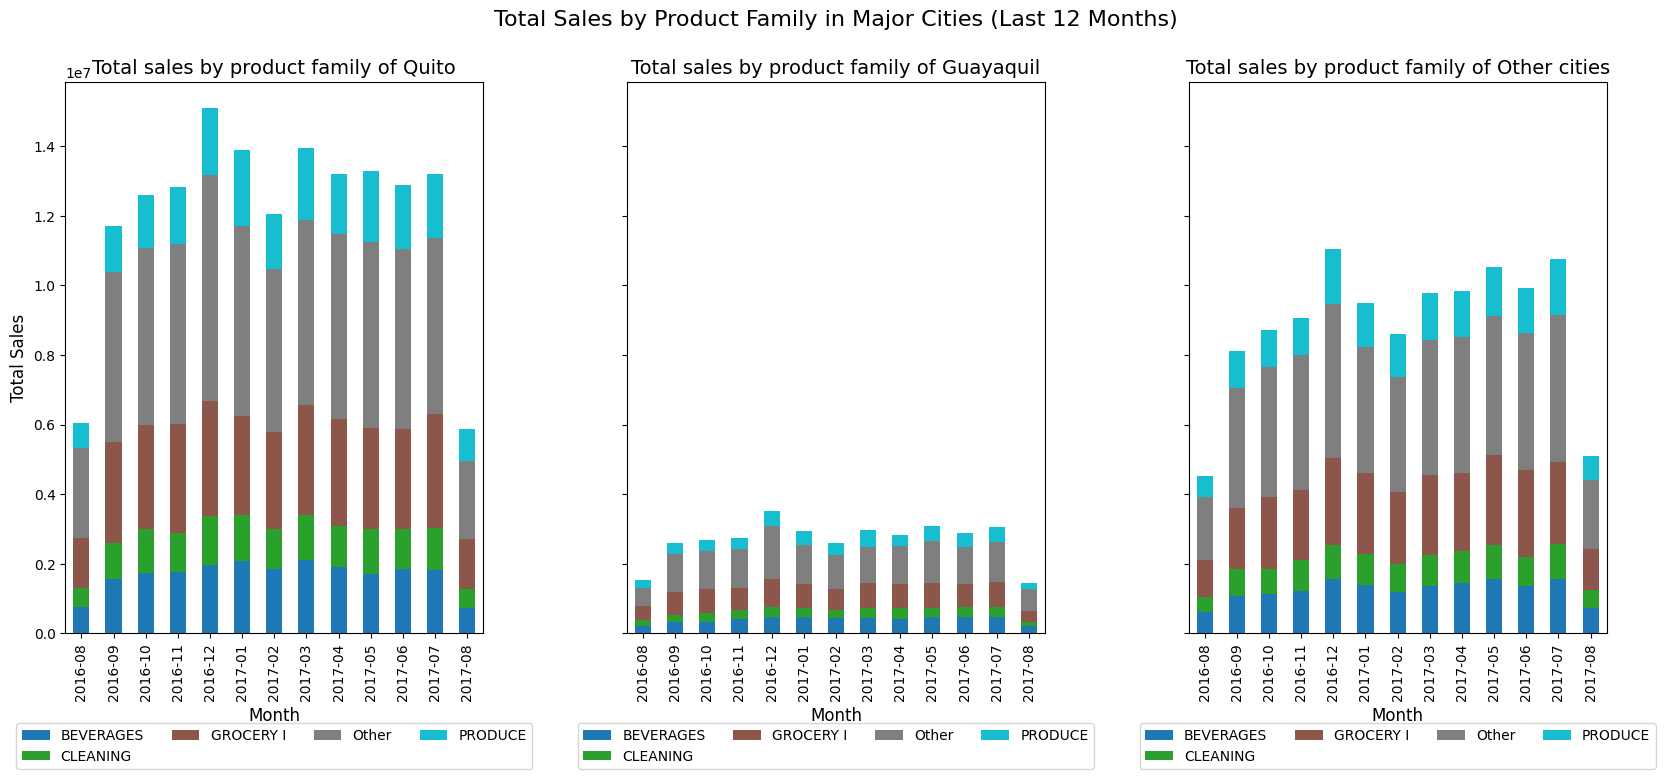

In [48]:

# Create sales data for last 12 months for cities "Quito", "Guayaquil" and the rest 
quito_sale = sale_store_family_data[(sale_store_family_data['date']>=last_12months) & (sale_store_family_data['city']== "Quito")].groupby(['YearMonth','family'])['sales'].sum().reset_index()
guayaquil_sale = sale_store_family_data[(sale_store_family_data['date']>=last_12months) & (sale_store_family_data['city']== "Guayaquil")].groupby(['YearMonth','family'])['sales'].sum().reset_index()
other_cities = sale_store_family_data[(sale_store_family_data['date']>=last_12months) & 
                                      (sale_store_family_data['city'] != "Guayaquil") & 
                                      (sale_store_family_data['city'] != "Quito")].groupby(['YearMonth','family'])['sales'].sum().reset_index()

# Grouping other groups of family 
def adjust_top_families(df, top_n=4):
    # Get the top N families with highest sales
    top_families = df.groupby("family")["sales"].sum().nlargest(top_n).index.tolist()
    
    # Replace non-top families with "Other"
    df["family"] = df["family"].apply(lambda x: x if x in top_families else "Other")
    
    # Aggregate sales again
    df_adjusted = df.groupby(["YearMonth", "family"], as_index=False).agg({"sales": "sum"})
    
    return df_adjusted

quito_sale_adjusted = adjust_top_families(quito_sale)
guayaquil_sale_adjusted = adjust_top_families(guayaquil_sale)
other_cities_adjusted = adjust_top_families(other_cities)

# Create a figure and plot barcharts for 3 of these above df as subplots 
fig,ax = plt.subplots(1,3,sharey=True,figsize=(17,8))

# Prepare the dataframe contain df that need to be plotted
dfs = [quito_sale_adjusted,guayaquil_sale_adjusted,other_cities_adjusted]
titles = ['Quito','Guayaquil','Other cities']


# Plot 3 barcharts subplots for the fig for each location
for i,(df,title) in enumerate(zip(dfs,titles)):
    pivot_df = df.pivot(index="YearMonth", columns="family", values="sales").fillna(0)
    pivot_df.plot(kind="bar", stacked=True, ax=ax[i], colormap="tab10")
    ax[i].set_title(f"Total sales by product family of {title}", fontsize=14)
    ax[i].set_xlabel("Month", fontsize=12)
    ax[i].legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
    ax[i].set_ylabel("Total Sales", fontsize=12)

plt.ylabel('Total sales', fontsize=12)
fig.suptitle('Total Sales by Product Family in Major Cities (Last 12 Months)', fontsize=16)
plt.tight_layout()
plt.show()